# AIRLINE SENTIMENT ANALYSIS

## Business Overview

### Introduction

The airline industry is highly competitive, and customer satisfaction plays a crucial role in determining the success and reputation of airlines. In today's digital age, social media platforms have become a significant avenue for customers to express their opinions and experiences with airlines. The Twitter US Airline Sentiment dataset provides a valuable opportunity for airlines to gain insights into customer sentiments and address their concerns effectively.

### Challenges

1. Flight delays (Unrelated to weather)
2. Poor customer service
3. Mishandling of luggage

### Proposed Solutions

- Efficient Schedule Planning: Optimize flight schedules by considering factors such as airport congestion, airspace availability, and historical on-time performance. Utilize advanced algorithms and data analysis to create efficient schedules that minimize the likelihood of delay

- Hire enough professionally equipped employees to aid in efficient customer service.

- Proper care when handling customer's luggage

### Problem Statement

The airline industry is currently facing a notable decrease in customer satisfaction, leading to unfavorable brand perception and diminished customer loyalty. This decline in satisfaction can be attributed to several factors, including flight delays, inadequate customer service, mishandling of luggage, and other operational inefficiencies. As a result, addressing these customer concerns and enhancing the overall brand perception has become a crucial focus for airlines.

### Objectives

1. To determine the overall sentiment expressed in tweets related to US airlines. This involves classifying tweets as positive, negative, or neutral to understand the general sentiment of customers towards different airlines.

2. To predict the customers who are likely to include us airlines in their future travels.

3. Grouping different customers based on their sentiments for ease of understanding each customers need.

### Success Metrics

- The final step in evaluating the quality of the model is train_test_split, which gives us an idea of how the model would perform with new data for the same variables. one that the model will be trained on, and another that it will be tested on. By default, the function takes 75% of the data as the training subset and the other 25% as its test subset. It measures the performance targeting an accurcay of 80%.

## Data Understanding

The data was sourced from [here](https://data.world/socialmediadata/twitter-us-airline-sentiment). It was scraped from February 2015 and contains different tweet riviews of different us airlines companies.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px 
import re
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
#downloading dependencies
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#creating lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading the dataset
df = pd.read_csv('Airline-Sentiment-2-w-AA.csv', encoding='latin1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
df.shape

(14640, 20)

In [4]:
def describe_columns(df):
    # Print column names
    print("Column Names:")
    print(df.columns)

    # Print data types
    print("\nData Types:")
    print(df.dtypes)

    # Print number of rows and columns
    print("\nShape:")
    print(df.shape)

    # Print df information
    print("\nInfo:")
    print(df.info())

    # Print descriptive statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df.describe())

    # Print missing values count per column
    print("\nMissing Values in percentages:")
    print((df.isna().sum() / len(df)) * 100)


describe_columns(df)

Column Names:
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

Data Types:
_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     i

>> The dataset has 14640 rows and 20 columns. It also has missing values with some columns registering approximately 90%. From our data overview, the text column needs preprocessing.

In [5]:
# Checking for duplicates
print('Duplicates')
df.duplicated().sum()

Duplicates


0

In [6]:
print('Duplicates in Unit ID Column')
df.duplicated(subset='_unit_id').sum()

Duplicates in Unit ID Column


0

#### EDA

In [7]:
# Distribution of airline sentiments

sentiments = df['airline_sentiment'].value_counts(normalize=True)
sentiments

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

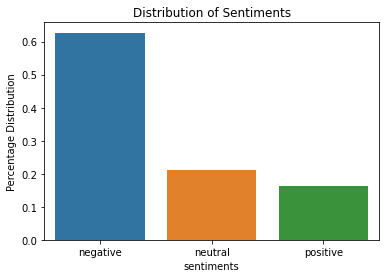

In [8]:
# Plot the distribution of sentiments
sns.barplot(x=sentiments.index, y=sentiments.values)
plt.xlabel('sentiments')
plt.ylabel('Percentage Distribution')
plt.title('Distribution of Sentiments');

In [9]:
# distribution of airlines

airlines = df['airline'].value_counts()
airlines

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

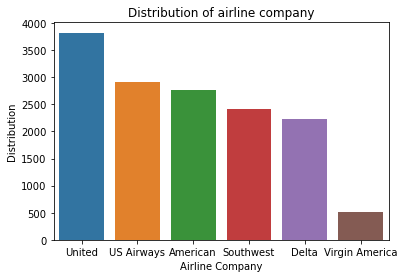

In [10]:
# plot the distribution of airlines

sns.barplot(x=airlines.index, y=airlines.values)
plt.xlabel('Airline Company')
plt.ylabel('Distribution')
plt.title('Distribution of airline company');

In [79]:
sentiments_by_airline = df.groupby('airline')['airline_sentiment'].value_counts()
print(sentiments_by_airline)


airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64


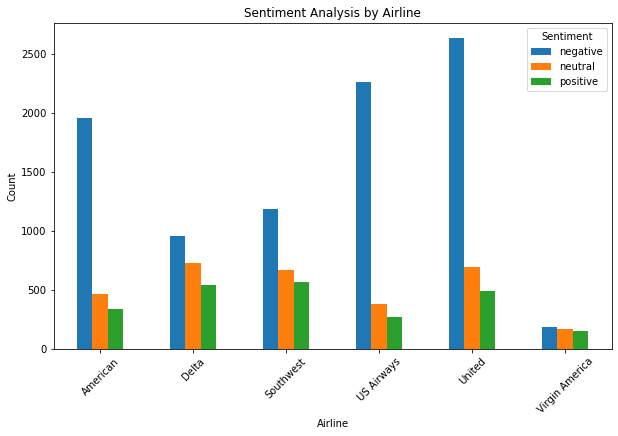

In [80]:
# Group the sentiment by airline
sentiment_by_airline = df.groupby(['airline', 'airline_sentiment']).size().unstack()

# Plot the grouped data
sentiment_by_airline.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Analysis by Airline')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()

>> From the plot above, United, US Airways and American have skyrocketing number of negative sentiments. Virgin America has an almost evenly distributed 

Reasons Of Negative Tweets:
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64 green


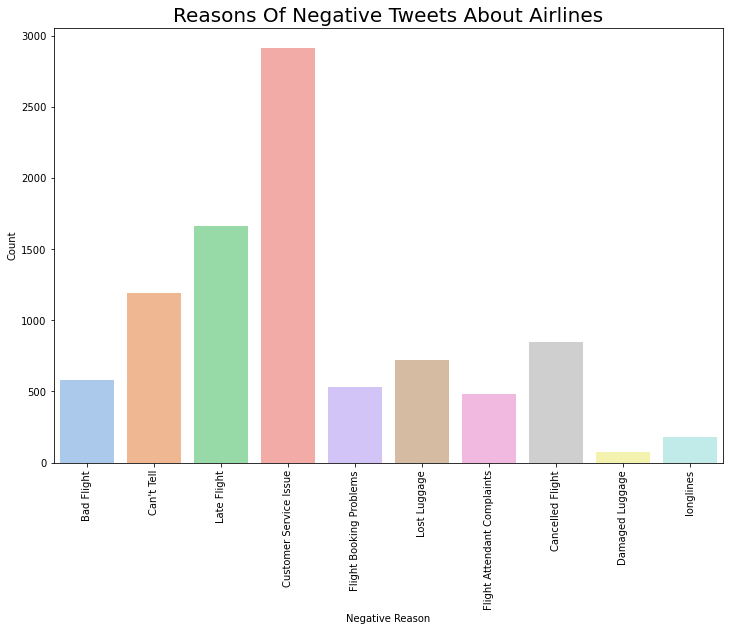

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the header for the negative reasons
print('Reasons Of Negative Tweets:')
print(df['negativereason'].value_counts(), 'green')

# Create a figure and axes for the plot
plt.figure(figsize=(12, 8))

# Plot the count of negative reasons
sns.countplot(x='negativereason', data=df, palette='pastel')

# Set the title and labels
plt.title('Reasons Of Negative Tweets About Airlines', fontsize=20)
plt.xlabel('Negative Reason')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()


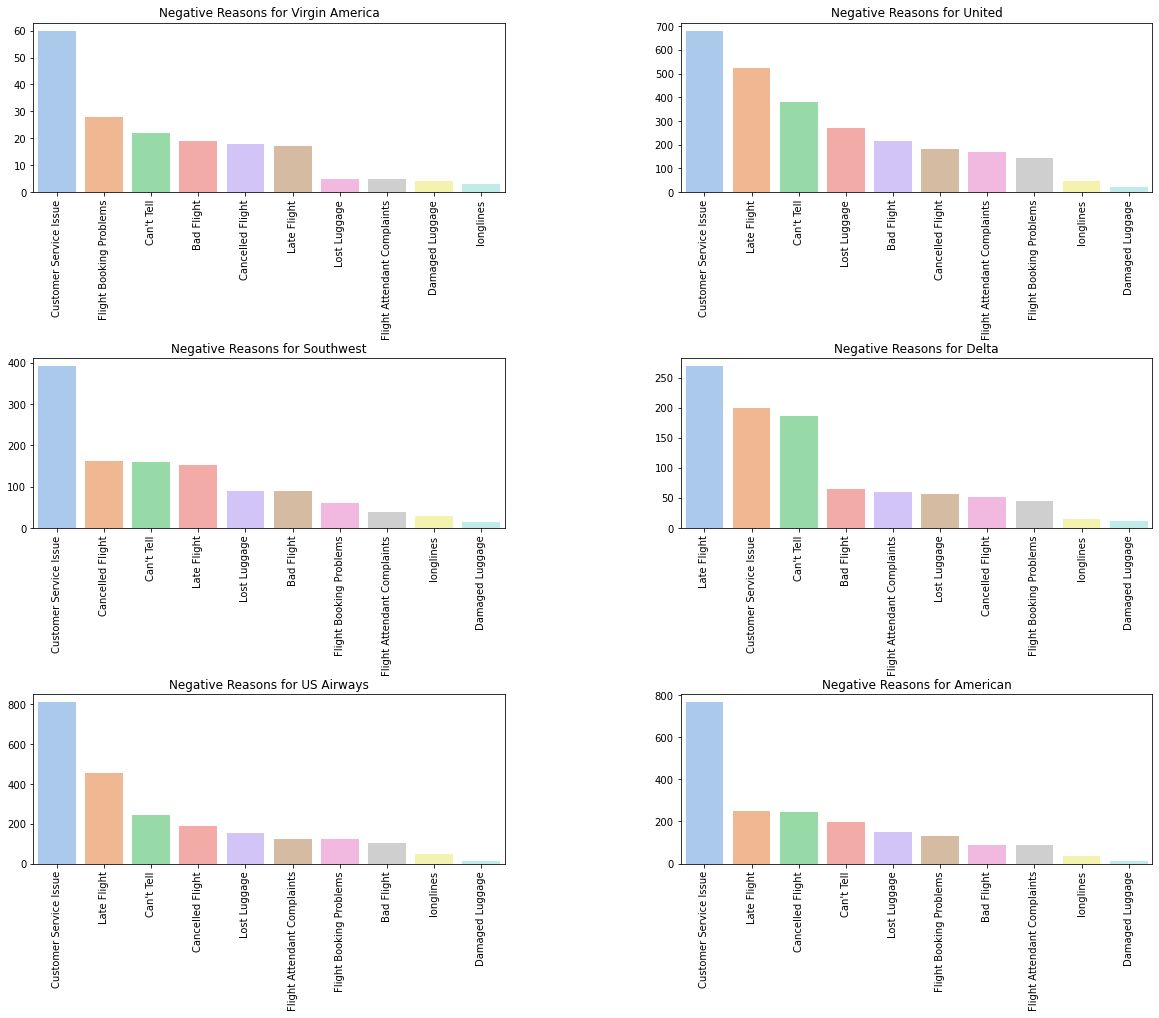

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_reason(airline, ax):
    airline_data = df[df['airline'] == airline]
    reason_count = airline_data['negativereason'].value_counts()
    sns.barplot(x=reason_count.index, y=reason_count.values, palette='pastel', ax=ax)
    ax.set_xticklabels(reason_count.index, rotation=90)
    ax.set_title('Negative Reasons for ' + airline)

# Get unique airlines
airlines = df['airline'].unique()

# Calculate number of rows and columns for subplots
num_rows = 3
num_cols = (len(airlines) + 1) // 3  # Round up to the nearest integer

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))
fig.tight_layout(pad=14.5)  # Increase spacing between subplots

# Iterate over airlines and plot reasons
for i, airline in enumerate(airlines):
    row = i // num_cols
    col = i % num_cols
    plot_reason(airline, axes[row][col])

# Remove empty subplots if the number of airlines is odd
if len(airlines) % 2 != 0:
    fig.delaxes(axes[num_rows-1][num_cols-1])

# Show the subplots
plt.show()


## Data Preprocessing

### Feature Selection

In [12]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [13]:
tweet_df = df[['airline_sentiment', 'text']]
tweet_df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [14]:
# Removing nametags

def remove_nametags(sentence):
    """A simple function to remove name tags"""
    clean_words = []
    for word in sentence.split():
        if "@" not in word:
            clean_words.append(word)
    return " ".join(clean_words)

tweet_df["text"] = tweet_df["text"].apply(remove_nametags)

In [15]:
# Previewing the tweet_df data
tweet_df[:50]

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $30 a flight for seats tha...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [16]:
# Removing numbers
nun_pattern = r'[0-9]'
tweet_df['text'] = tweet_df['text'].replace(to_replace=nun_pattern, value='', regex=True)
tweet_df[:50]

,airline_sentiment,text
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it
5,negative,seriously would pay $ a flight for seats that ...
6,positive,"yes, nearly every time I fly VX this ÛÏear wo..."
7,neutral,Really missed a prime opportunity for Men With...
8,positive,"Well, I didn'tÛ_but NOW I DO! :-D"
9,positive,"it was amazing, and arrived an hour early. You..."


In [17]:
# remove punctuations
import string
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
# change to lowercase
tweet_df['text'] = tweet_df['text'].apply(lambda x: x.lower())
tweet_df[:50]

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ûïear wor...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntûbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [18]:
# Removing emojis

def remove_emojis(data):
    """A simple function to remove all emojis"""
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002500-\U00002BEF"
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642" 
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"
                           u"\u3030"
                           "]+", re.UNICODE)
    return re.sub(emoji_pattern, "", data)

tweet_df["text"] = tweet_df["text"].apply(remove_emojis)

In [19]:
# Removing non_standard_char
def remove_non_standard_char(review):
    """A simple function to remove characters outside the ASCII range"""
    pattern = re.compile(r"[^\x00-\x7F]+")
    clean_string = re.sub(pattern, "", review)
    return clean_string

tweet_df["text"] = tweet_df["text"].apply(remove_non_standard_char)

In [20]:
tweet_df[:50]

,airline_sentiment,text
0,neutral,what said
1,positive,plus youve added commercials to the experience...
2,neutral,i didnt today must mean i need to take another...
3,negative,its really aggressive to blast obnoxious enter...
4,negative,and its a really big bad thing about it
5,negative,seriously would pay a flight for seats that d...
6,positive,yes nearly every time i fly vx this ear worm w...
7,neutral,really missed a prime opportunity for men with...
8,positive,well i didntbut now i do d
9,positive,it was amazing and arrived an hour early youre...


In [21]:
# Removing https tags
hashtagpattern = r'#\w+\s*'
tweet_df['text'] = tweet_df['text'].str.replace(hashtagpattern, '')

In [22]:
# remove http tags
urlpattern = r'(?:http)s?\S+'
tweet_df['text'] = tweet_df['text'].str.replace(urlpattern, '')
tweet_df[-50:]

,airline_sentiment,text
14590,positive,thank you for quick responses aa usually has f...
14591,negative,what are my chances of making a connection to ...
14592,negative,beyond frustrated with no call back from auto ...
14593,negative,ahhhh your silence is golden now this tops it ...
14594,negative,hey aa can you help with an itinerary for a p...
14595,negative,wheres my dm wheres my voucher whos paying my ...
14596,negative,weve been on hold for hours
14597,negative,do you dislike delays when theyre caused by yo...
14598,neutral,can you guys help me please
14599,negative,its not the weather its also gross incompetenc...


In [23]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
include_stopwords = ["wouldn", "won", "weren", "wasn", "shouldn", "shan", "needn", "mustn",
                     "mightn", "isn", "haven", "hasn", "hadn", "doesn", "didn", "couldn",
                     "aren", "ain", "don", "not"]
stop_words = list(stop_words - set(include_stopwords)) + ['would']

In [24]:
def remove_stopwords(words):
    clean_words = []
    for word in words.split():
        if word not in stop_words:
            clean_words.append(word)
    return " ".join(clean_words)

In [25]:
tweet_df['text'] = tweet_df['text'].apply(remove_stopwords)
tweet_df[:50]

,airline_sentiment,text
0,neutral,said
1,positive,plus youve added commercials experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
5,negative,seriously pay flight seats didnt playing reall...
6,positive,yes nearly every time fly vx ear worm wont go ...
7,neutral,really missed prime opportunity men without ha...
8,positive,well didntbut
9,positive,amazing arrived hour early youre good


In [26]:
# from nltk.stem import SnowballStemmer
# stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
def lemmatize_words(review):
    lem_words = []
    for word in review.split():
        lem_word = lemmatizer.lemmatize(word)
        lem_words.append(lem_word)
    return " ".join(lem_words)

tweet_df["text"] = tweet_df["text"].apply(lemmatize_words)

In [27]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
import nltk

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
import string

sentence = "I really hate her. She's so mean."
tokens = nltk.word_tokenize(sentence)
stopwords_ = set(stopwords.words("english"))
filtered_tokens = [token for token in tokens if token.lower() not in stopwords_]
filtered_tokens = [token for token in filtered_tokens if token not in string.punctuation]
sa = SentimentIntensityAnalyzer()
scores = {token: sa.polarity_scores(token)["compound"] for token in filtered_tokens}
#sorted_words =  sorted(scores.items(), key=lambda x: x[1], reverse=True)
impactful_words = [(word, score) for word, score in scores.items() if score < 0]
sorted_words =  sorted(impactful_words, key=lambda x: np.abs(x[1]), reverse=True)
impactful_words = [word for word, score in sorted_words][:2]
impactful_words

['hate']

In [31]:
#positive_words

In [32]:
#sorted_words

In [33]:
#scores

In [34]:
def impactful_words_positive(review, num_words=2):
    """Function that gets the most impactful positive reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    sorted_words =  sorted(scores.items(), key=lambda x: x[1], reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)


In [35]:
def impactful_words_negative(review, num_words=2):
    """Function that gets the most impactful negative reviews"""
    tokens = nltk.word_tokenize(review)
    sia = SentimentIntensityAnalyzer()
    scores = {token: sia.polarity_scores(token)["compound"] for token in tokens}
    impactful_words = [(word, score) for word, score in scores.items() if score < 0]
    sorted_words =  sorted(impactful_words, key=lambda x: np.abs(x[1]), reverse=True)
    impactful_words = [word for word, score in sorted_words][:num_words]
    return list(impactful_words)
    

In [36]:
# Subsetting the sentiments into positive, negative and neutral.
neg_df = tweet_df[tweet_df['airline_sentiment']=='negative']
pos_df = tweet_df[tweet_df['airline_sentiment']=='positive']
neu_df = tweet_df[tweet_df['airline_sentiment']=='neutral']

In [37]:
pos_df['impactful_words'] = pos_df['text'].apply(impactful_words_positive)

In [38]:
neg_df['impactful_words'] = neg_df['text'].apply(impactful_words_negative)

In [39]:
neg_df[:50]

,airline_sentiment,text,impactful_words
3,negative,really aggressive blast obnoxious entertainmen...,"[obnoxious, aggressive]"
4,negative,really big bad thing,[bad]
5,negative,seriously pay flight seat didnt playing really...,"[bad, seriously]"
15,negative,sfopdx schedule still mia,[mia]
17,negative,flew nyc sfo last week couldnt fully sit seat ...,[]
20,negative,first fare may three time carrier seat availab...,[]
24,negative,guy messed seating reserved seating friend guy...,[messed]
25,negative,status match program applied three week called...,[]
26,negative,happened ur vegan food option least say ur sit...,[fail]
28,negative,amazing cant get cold air vent vx noair worstf...,[]


In [ ]:
pos_df[-50:]

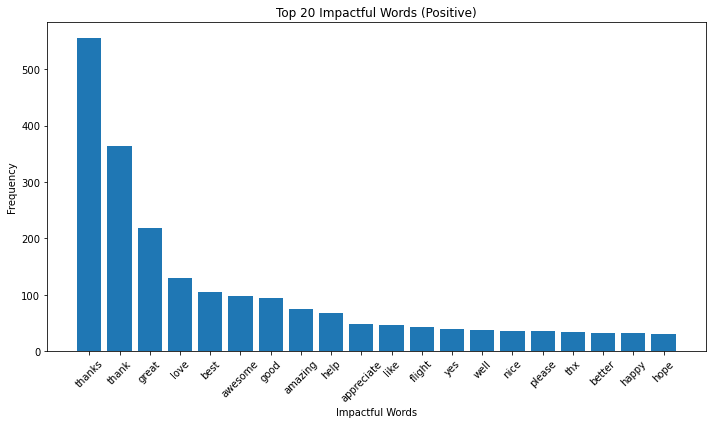

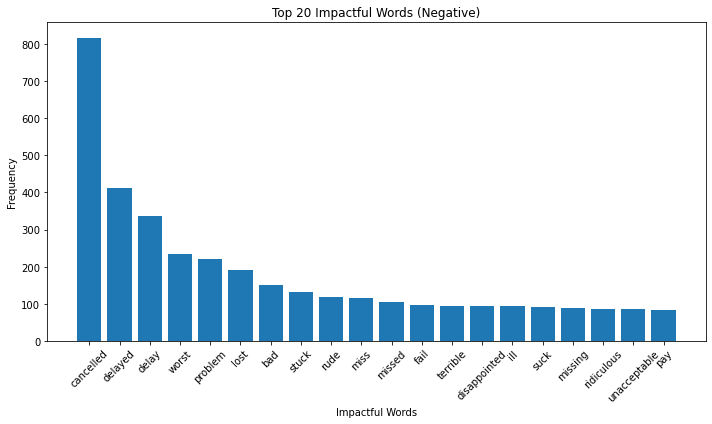

In [41]:
# Function to plot the top impactful words
def plot_top_words(df, category, num_words=20):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df['impactful_words'].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel('Impactful Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Plot top impactful words for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words for negative reviews
plot_top_words(neg_df, 'Negative')

In [42]:
def tran_test(data, random_state=42):
    train, test = train_test_split(data, random_state=random_state)
    return train, test

In [43]:
neg_train, neg_test = train_test_split(neg_df)
pos_train, pos_test = train_test_split(pos_df)
neu_train, neu_test = train_test_split(neu_df)

In [44]:
neg_train["impactful_words"] = neg_train["impactful_words"].apply(lambda x: " ".join(x))
neg_test["impactful_words"] = neg_test["impactful_words"].apply(lambda x: " ".join(x))
pos_train["impactful_words"] = pos_train["impactful_words"].apply(lambda x: " ".join(x))
pos_test["impactful_words"] = pos_test["impactful_words"].apply(lambda x: " ".join(x))

In [45]:
train = pd.concat([neg_train, pos_train, neu_train])
test = pd.concat([neg_test, pos_test, neu_test])

In [46]:
def replace(text):
    if text == "":
        return np.NaN
    else:
        return text
        
train["impactful_words"] = train["impactful_words"].apply(replace)
test["impactful_words"] = test["impactful_words"].apply(replace)

In [47]:
train

,airline_sentiment,text,impactful_words
8795,negative,technically could drive jfk put request tomorr...,NaN
1293,negative,funny paid check bag flight begging folk check...,NaN
12354,negative,good morning tamara well try get comfortably f...,NaN
13561,negative,not sure made stand line outside plane isnt re...,NaN
8825,negative,tsapre work every airline pay good money spent...,pay
...,...,...,...
3083,neutral,predawn flight miami ewr annual sobewff trip,NaN
8477,neutral,there schedule change tix change destination a...,NaN
7051,neutral,bro,NaN
294,neutral,result handily exceed forecast,NaN


In [48]:
train.fillna("cant tell", inplace=True)

In [114]:
test.fillna("cant tell", inplace=True)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_sents = TfidfVectorizer(max_features=2000)
X_train_sents = vectorizer_sents.fit_transform(train["text"])
X_test_sents = vectorizer_sents.transform(test["text"])

vectorizer_impacts = TfidfVectorizer()
X_train_impacts = vectorizer_impacts.fit_transform(train["impactful_words"])
X_test_impacts = vectorizer_impacts.transform(test["impactful_words"])

In [51]:
X_train_sents = pd.DataFrame(X_train_sents.todense())
X_train_impacts = pd.DataFrame(X_train_impacts.todense())

X_test_sents = pd.DataFrame(X_test_sents.todense())
X_test_impacts = pd.DataFrame(X_test_impacts.todense())

In [52]:
X_train = pd.concat([X_train_sents, X_train_impacts], axis=1)
X_test = pd.concat([X_test_sents, X_test_impacts], axis=1)

In [53]:
y_train = train["airline_sentiment"]
y_test = test["airline_sentiment"]

In [54]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
test_preds = clf.predict(X_test)

In [56]:
train_preds = clf.predict(X_train)

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, train_preds)

0.9965388468895163

In [58]:
accuracy_score(y_test, test_preds)

0.8429390876809615

### Randomforest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rcf=RandomForestClassifier(random_state=42)
rcf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [72]:
test_preds_rcf = rcf.predict(X_test)
train_preds_rcf = rcf.predict(X_train)

In [73]:
accuracy_score(y_train, train_preds_rcf)

0.9965388468895163

In [74]:
accuracy_score(y_test, test_preds_rcf)

0.8669762360010926

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores=cross_val_score(rcf,X_train,y_train,cv=5)
scores

array([0.85837887, 0.86384335, 0.85883424, 0.85883424, 0.85603645])

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_preds_rcf))


              precision    recall  f1-score   support

    negative       0.86      0.94      0.90      2295
     neutral       0.79      0.70      0.74       775
    positive       0.99      0.81      0.89       591

    accuracy                           0.87      3661
   macro avg       0.88      0.82      0.85      3661
weighted avg       0.87      0.87      0.87      3661



#### GradientBooostClassifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [95]:
gbc_train_prediction=gbc.predict(X_train)
gbc_test_prediction=gbc.predict(X_test)

In [99]:
accuracy_score(y_test,gbc)


TypeError: 'numpy.float64' object is not callable

In [120]:
!pip install wordcloud


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

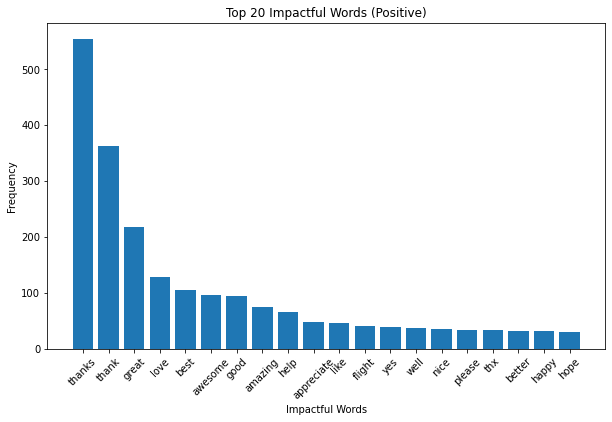

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_top_words(df, category, num_words=20):
    # Flatten the list of impactful words
    words_flat = np.concatenate(df['impactful_words'].values)
    
    # Calculate the word frequencies
    word_counts = np.unique(words_flat, return_counts=True)
    
    # Sort the words and counts in descending order
    sorted_indices = np.argsort(word_counts[1])[::-1]
    sorted_words = word_counts[0][sorted_indices]
    sorted_counts = word_counts[1][sorted_indices]
    
    # Select the top N words
    top_words = sorted_words[:num_words]
    top_counts = sorted_counts[:num_words]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(top_words, top_counts)
    
    # Set labels and title
    plt.xlabel('Impactful Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {num_words} Impactful Words ({category})')
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_counts)))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {num_words} Impactful Words Word Cloud ({category})')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

# Plot top impactful words and word cloud for positive reviews
plot_top_words(pos_df, 'Positive')

# Plot top impactful words and word cloud for negative reviews
plot_top_words(neg_df, 'Negative')

In [67]:
X = tweet_df.drop(['airline_sentiment'],axis=1)
y = tweet_df['airline_sentiment']

In [68]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [69]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

ValueError: Found input variables with inconsistent numbers of samples: [1, 14640]